# Imputing Numerical Data

## Mean_median imputation

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [149]:
df=pd.read_csv('../../data/titanic_toy.csv')

In [150]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [152]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

Age have 20% of missing value and fare contains 5% of missing value

In [153]:

X = df.drop(columns=['Survived'])
y = df[['Survived']]

In [154]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [155]:
X_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

In [156]:
mean_age=df['Age'].mean()
median_age=df['Age'].median()


mean_fare=df['Fare'].mean()
median_fare=df['Fare'].median()

In [157]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [158]:

X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
678,43.0,46.9000,7,43.0,43.000000,46.9000,46.9000
628,26.0,7.8958,0,26.0,26.000000,7.8958,7.8958
368,NaN,7.7500,0,28.0,29.699118,7.7500,7.7500
601,NaN,7.8958,0,28.0,29.699118,7.8958,7.8958
824,2.0,39.6875,5,2.0,2.000000,39.6875,39.6875


In [159]:

print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print("\n\n")

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  162.3385298533084
Age Variance after mean imputation:  161.81386645586778



Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  2340.098181126128
Fare Variance after mean imputation:  2324.2440261086986


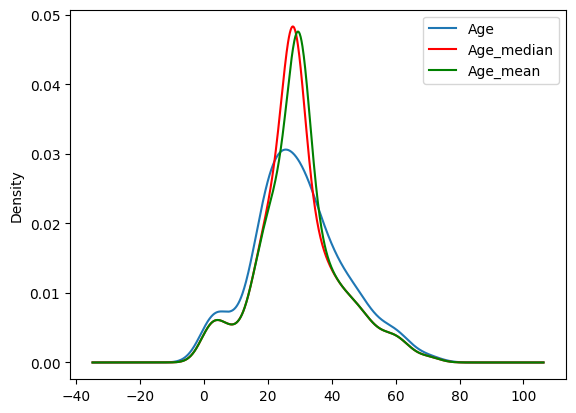

In [160]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

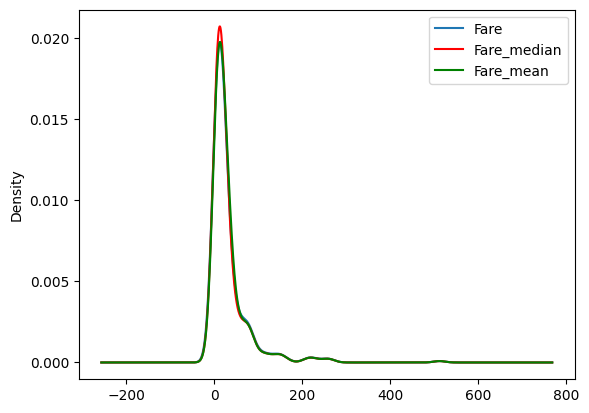

In [161]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [162]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858451,66.631558
Fare,70.719262,2448.197914,17.258917,59.661820,55.800924,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.088278,-5.143296,16.476326,16.386748
Age_median,204.349513,59.661820,-5.088278,162.338530,161.838181,55.142638,56.613065
Age_mean,204.349513,55.800924,-5.143296,161.838181,161.813866,51.541608,52.948856
Fare_median,64.858451,2448.197914,16.476326,55.142638,51.541608,2340.098181,2324.533881
Fare_mean,66.631558,2448.197914,16.386748,56.613065,52.948856,2324.533881,2324.244026


In [163]:

X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087355,0.090109
Fare,0.092644,1.000000,0.208268,0.094361,0.088382,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.241469,-0.244475,0.205942,0.205520
Age_median,1.000000,0.094361,-0.241469,1.000000,0.998533,0.089466,0.092165
Age_mean,1.000000,0.088382,-0.244475,0.998533,1.000000,0.083759,0.086339
Fare_median,0.087355,1.000000,0.205942,0.089466,0.083759,1.000000,0.996731
Fare_mean,0.090109,1.000000,0.205520,0.092165,0.086339,0.996731,1.000000


In [164]:
X_train.columns

Index(['Age', 'Fare', 'Family', 'Age_median', 'Age_mean', 'Fare_median',
       'Fare_mean'],
      dtype='object')

In [165]:
X_test.columns

Index(['Age', 'Fare', 'Family'], dtype='object')

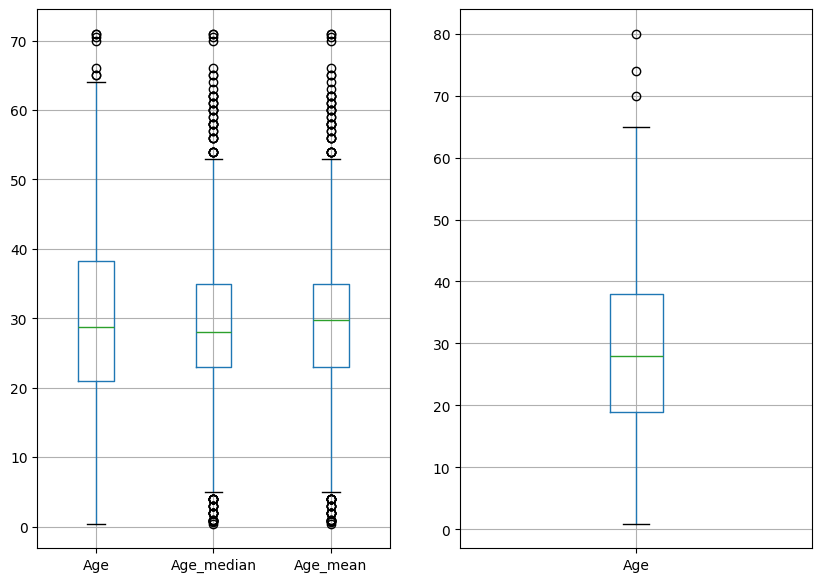

In [166]:
plt.figure(figsize=(10,7))
plt.subplot(121)
X_train[['Age','Age_median','Age_mean']].boxplot()


plt.subplot(122)
X_test[['Age']].boxplot()

plt.show()


In [167]:
X_train_store=X_train
X_test_store=X_test

### Using SkLearn

In [168]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [169]:
X_train

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0
...,...,...,...
534,30.0,8.6625,0
584,NaN,8.7125,0
493,71.0,49.5042,0
527,NaN,221.7792,0


In [170]:
y_train

,Survived
30,0
10,1
873,0
182,0
876,0
...,...
534,0
584,0
493,0
527,0


In [171]:
imputer1=SimpleImputer(strategy='mean')
imputer2=SimpleImputer(strategy='median')


transformer1=ColumnTransformer(
    [
        ('age',imputer1,['Age']),
        ('fare',imputer2,['Fare'])
    ],
    remainder='passthrough'
)

transformer1

ColumnTransformer(remainder='passthrough',
                  transformers=[('age', SimpleImputer(), ['Age']),
                                ('fare', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [172]:
transformer1.fit(X_train)

c:\Users\shafe\anaconda3\envs\DeepLearning\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('age', SimpleImputer(), ['Age']),
                                ('fare', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [173]:
transformer1.get_params()

{'force_int_remainder_cols': True,
 'n_jobs': None,
 'remainder': 'passthrough',
 'sparse_threshold': 0.3,
 'transformer_weights': None,
 'transformers': [('age', SimpleImputer(), ['Age']),
  ('fare', SimpleImputer(strategy='median'), ['Fare'])],
 'verbose': False,
 'verbose_feature_names_out': True,
 'age': SimpleImputer(),
 'fare': SimpleImputer(strategy='median'),
 'age__add_indicator': False,
 'age__copy': True,
 'age__fill_value': None,
 'age__keep_empty_features': False,
 'age__missing_values': nan,
 'age__strategy': 'mean',
 'fare__add_indicator': False,
 'fare__copy': True,
 'fare__fill_value': None,
 'fare__keep_empty_features': False,
 'fare__missing_values': nan,
 'fare__strategy': 'median'}

In [174]:
transformer1.named_transformers_['age'].statistics_

array([29.78590426])

In [175]:
transformer1.named_transformers_['fare'].statistics_

array([14.4583])

In [176]:
X_train

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0
...,...,...,...
534,30.0,8.6625,0
584,NaN,8.7125,0
493,71.0,49.5042,0
527,NaN,221.7792,0


In [177]:

transformer1.transform(X_train)

array([[ 40.        ,  27.7208    ,   0.        ],
       [  4.        ,  16.7       ,   2.        ],
       [ 47.        ,   9.        ,   0.        ],
       ...,
       [ 71.        ,  49.5042    ,   0.        ],
       [ 29.78590426, 221.7792    ,   0.        ],
       [ 29.78590426,  25.925     ,   0.        ]])

In [178]:
transformer1.transform(X_test)

array([[ 42.        ,  26.2875    ,   0.        ],
       [ 21.        ,   8.05      ,   0.        ],
       [ 24.        ,  65.        ,   3.        ],
       [ 28.        ,  56.4958    ,   0.        ],
       [ 17.        ,   7.925     ,   6.        ],
       [ 30.        ,   7.8958    ,   0.        ],
       [ 80.        ,  30.        ,   0.        ],
       [ 25.        ,   7.25      ,   0.        ],
       [ 50.        , 133.65      ,   2.        ],
       [ 25.        ,  26.        ,   1.        ],
       [ 35.        ,  26.        ,   0.        ],
       [ 35.        ,  90.        ,   1.        ],
       [ 55.        ,  16.        ,   0.        ],
       [ 29.78590426,  56.4958    ,   0.        ],
       [ 29.78590426,  56.4958    ,   0.        ],
       [ 19.        ,   7.8542    ,   1.        ],
       [ 29.78590426,  15.2458    ,   2.        ],
       [ 49.        ,   0.        ,   0.        ],
       [ 18.        ,  14.4583    ,   1.        ],
       [ 65.        ,   7.75   

## Arbitarary value Imputation

In [179]:
X_train=X_train_store
X_test=X_test_store

In [180]:

X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [181]:
X_train.sample(10)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean,Age_99,Age_minus1,Fare_999,Fare_minus1
381,1.0,15.7417,2,1.0,1.000000,15.7417,15.7417,1.0,1.0,15.7417,15.7417
720,6.0,33.0000,1,6.0,6.000000,33.0000,33.0000,6.0,6.0,33.0000,33.0000
27,19.0,263.0000,5,19.0,19.000000,263.0000,263.0000,19.0,19.0,263.0000,263.0000
437,24.0,18.7500,5,24.0,24.000000,18.7500,18.7500,24.0,24.0,18.7500,18.7500
636,32.0,7.9250,0,32.0,32.000000,7.9250,7.9250,32.0,32.0,7.9250,7.9250
504,16.0,86.5000,0,16.0,16.000000,86.5000,86.5000,16.0,16.0,86.5000,86.5000
113,20.0,9.8250,1,20.0,20.000000,9.8250,9.8250,20.0,20.0,9.8250,9.8250
26,NaN,7.2250,0,28.0,29.699118,7.2250,7.2250,99.0,-1.0,7.2250,7.2250
810,26.0,7.8875,0,26.0,26.000000,7.8875,7.8875,26.0,26.0,7.8875,7.8875
301,NaN,23.2500,2,28.0,29.699118,23.2500,23.2500,99.0,-1.0,23.2500,23.2500


In [184]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99  imputation: ', X_train['Age_99'].var())
print('Age Variance after -1  imputation: ', X_train['Age_minus1'].var())

print("\n\n")

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999  imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.34951339046142
Age Variance after 99  imputation:  951.7275570187188
Age Variance after -1  imputation:  318.0896202624488



Original Fare variable variance:  2448.1979137063163
Fare Variance after 999  imputation:  47219.202652176304
Fare Variance after -1 imputation:  2378.5676784883494


<Axes: title={'center': 'Age_minus1'}, ylabel='Density'>

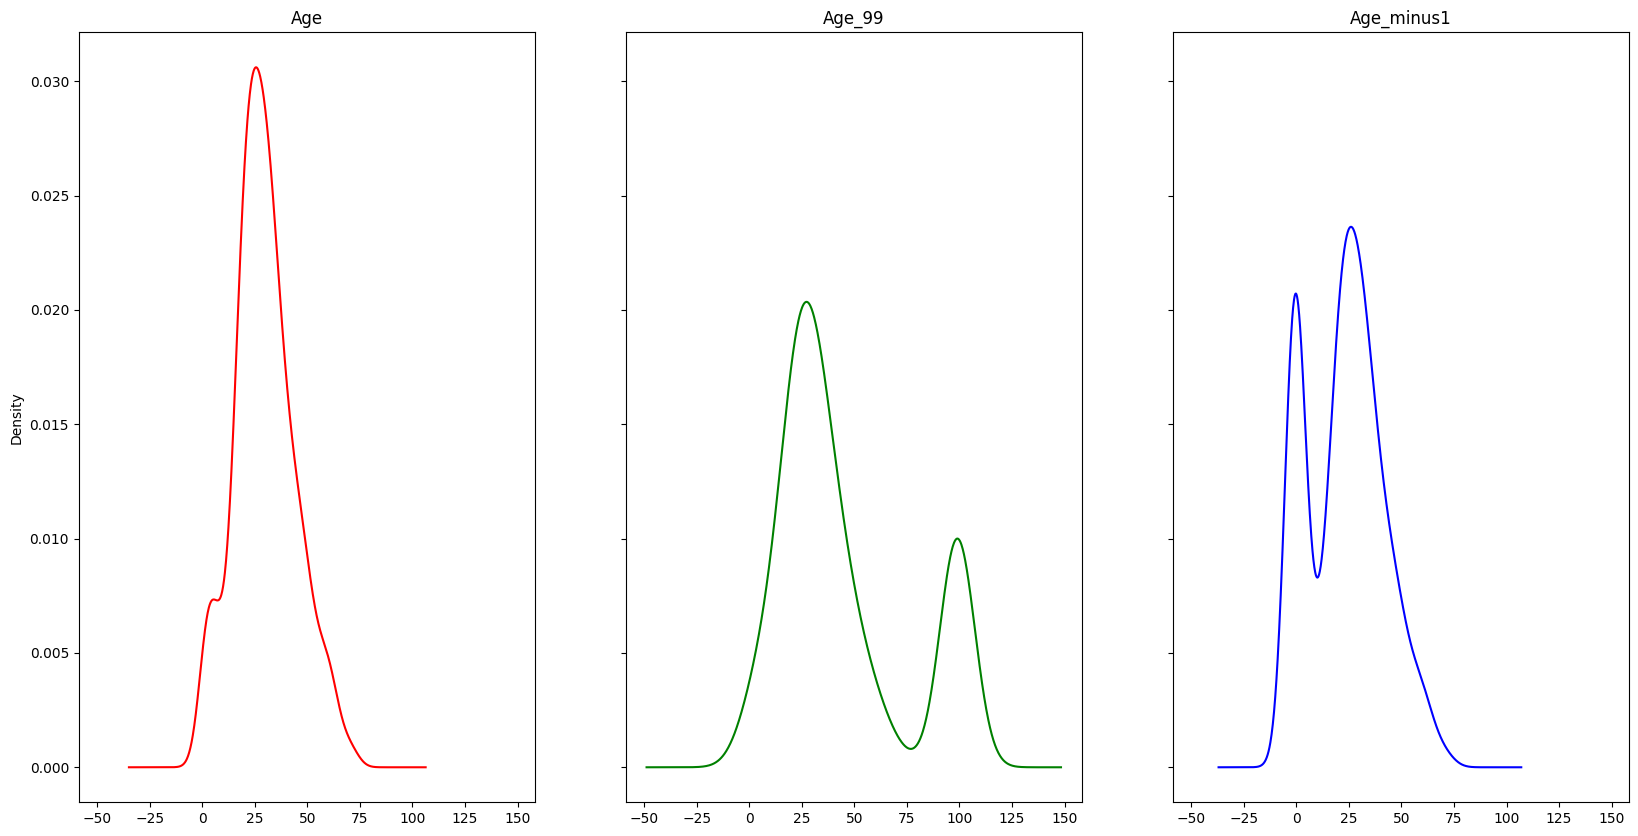

In [209]:
fig,ax=plt.subplots(1,3,
                    figsize=(20,10),
                    sharey=True,
                    sharex=True)
ax[0].set_title("Age")
X_train['Age'].plot(kind='kde',ax=ax[0],color='red')
ax[1].set_title("Age_99")
X_train['Age_99'].plot(kind='kde',ax=ax[1],color='green')
ax[2].set_title("Age_minus1")
X_train['Age_minus1'].plot(kind='kde',ax=ax[2],color='blue')

<Axes: ylabel='Density'>

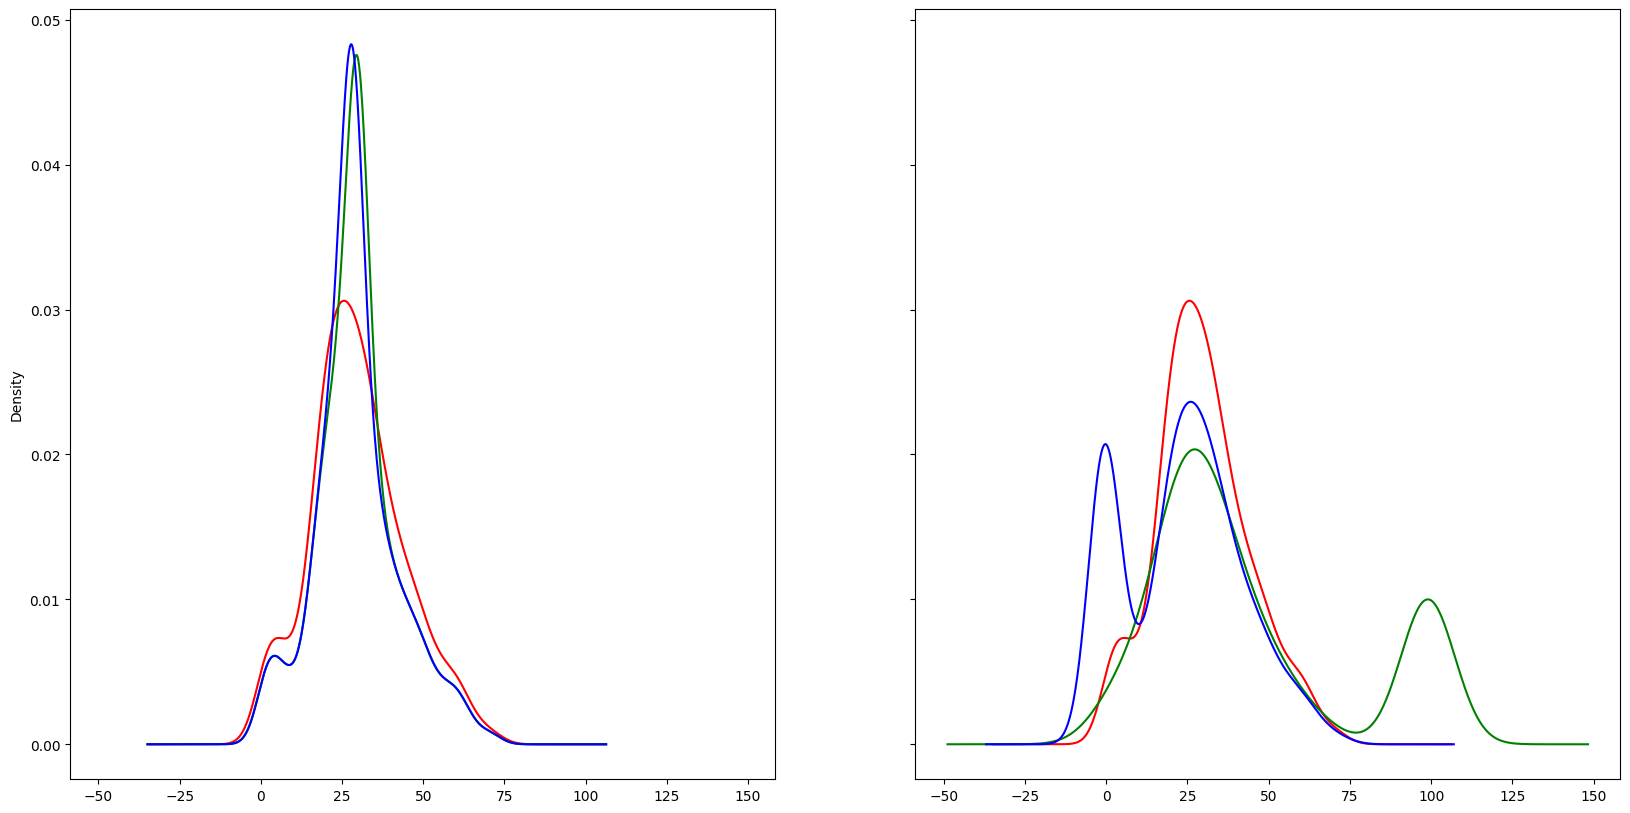

In [206]:
fig,ax=plt.subplots(1,2,
                    figsize=(20,10),
                    sharey=True,
                    sharex=True)

X_train['Age'].plot(kind='kde',ax=ax[0],color='red')
X_train['Age_mean'].plot(kind='kde',ax=ax[0],color='green')
X_train['Age_median'].plot(kind='kde',ax=ax[0],color='blue')



X_train['Age'].plot(kind='kde',ax=ax[1],color='red')
X_train['Age_99'].plot(kind='kde',ax=ax[1],color='green')
X_train['Age_minus1'].plot(kind='kde',ax=ax[1],color='blue')


In [211]:
X_train.columns

Index(['Age', 'Fare', 'Family', 'Age_median', 'Age_mean', 'Fare_median',
       'Fare_mean', 'Age_99', 'Age_minus1', 'Fare_999', 'Fare_minus1'],
      dtype='object')

<Axes: title={'center': 'Fare_minus1'}, ylabel='Density'>

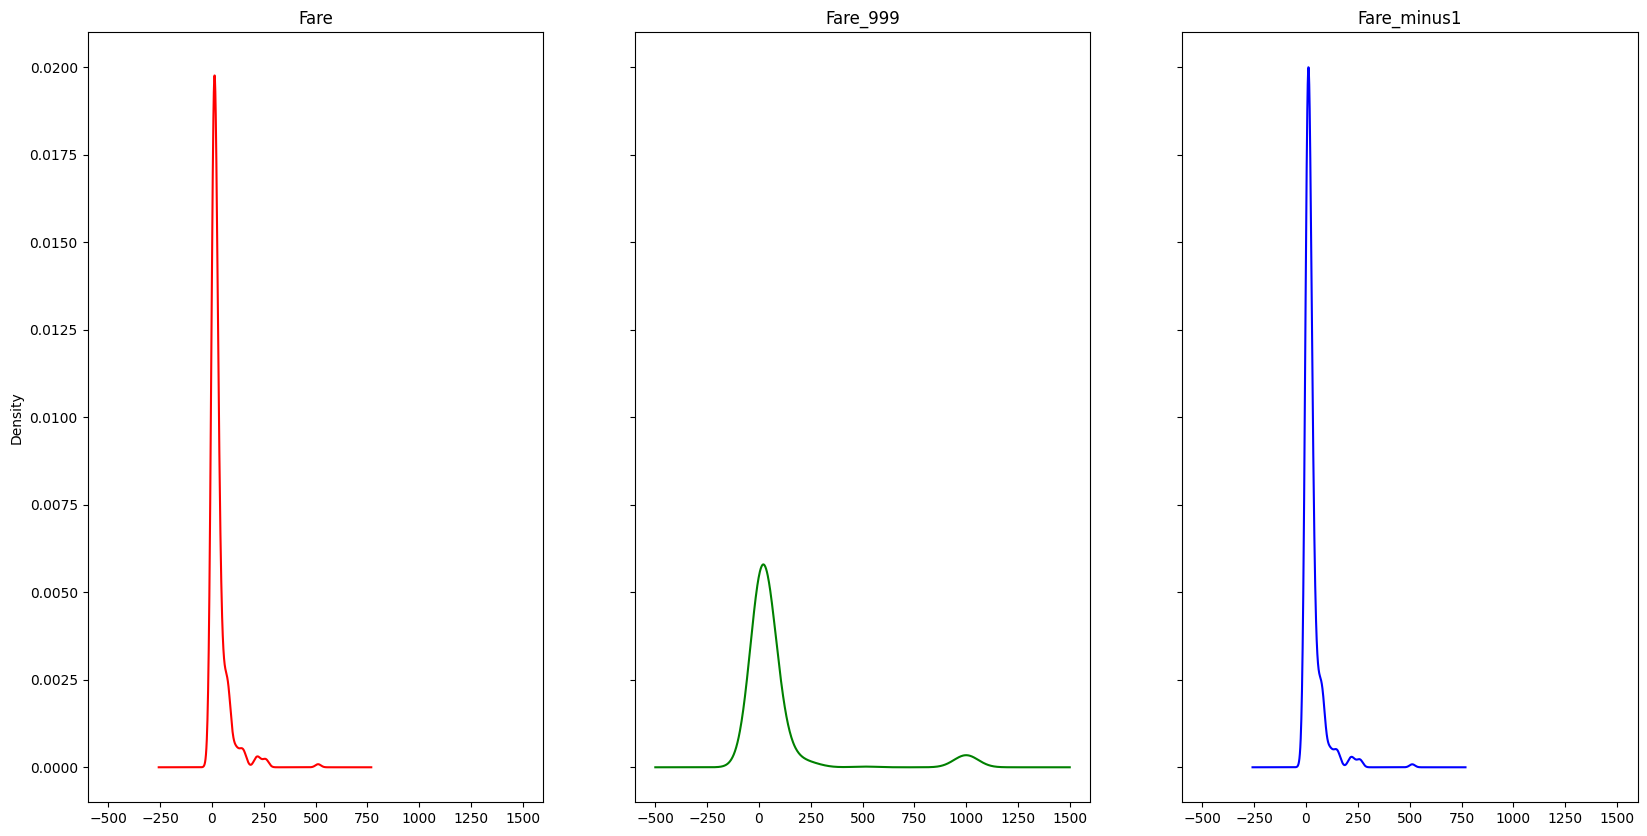

In [212]:
fig,ax=plt.subplots(1,3,
                    figsize=(20,10),
                    sharey=True,
                    sharex=True)
ax[0].set_title("Fare")
X_train['Fare'].plot(kind='kde',ax=ax[0],color='red')
ax[1].set_title("Fare_999")
X_train['Fare_999'].plot(kind='kde',ax=ax[1],color='green')
ax[2].set_title("Fare_minus1")
X_train['Fare_minus1'].plot(kind='kde',ax=ax[2],color='blue')

In [219]:

X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858451,66.631558,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,59.661820,55.800924,2448.197914,2448.197914,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.088278,-5.143296,16.476326,16.386748,-7.387287,-4.149246,11.528625,16.553989
Age_median,204.349513,59.661820,-5.088278,162.338530,161.838181,55.142638,56.613065,141.430758,170.878324,136.359537,53.867794
Age_mean,204.349513,55.800924,-5.143296,161.838181,161.813866,51.541608,52.948856,160.822161,162.253175,129.268923,50.321540
Fare_median,64.858451,2448.197914,16.476326,55.142638,51.541608,2340.098181,2324.533881,-95.331415,116.603871,1480.426543,2353.592259
Fare_mean,66.631558,2448.197914,16.386748,56.613065,52.948856,2324.533881,2324.244026,-96.500999,119.152612,2308.524138,2324.785183
Age_99,204.349513,-101.671097,-7.387287,141.430758,160.822161,-95.331415,-96.500999,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,170.878324,162.253175,116.603871,119.152612,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,136.359537,129.268923,1480.426543,2308.524138,-159.931663,257.379887,47219.202652,762.474982


In [220]:

X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087355,0.090109,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,0.094361,0.088382,1.000000,1.000000,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.241469,-0.244475,0.205942,0.205520,-0.144787,-0.140668,0.032079,0.205233
Age_median,1.000000,0.094361,-0.241469,1.000000,0.998533,0.089466,0.092165,0.359813,0.751972,0.049251,0.086688
Age_mean,1.000000,0.088382,-0.244475,0.998533,1.000000,0.083759,0.086339,0.409809,0.715172,0.046766,0.081113
Fare_median,0.087355,1.000000,0.205942,0.089466,0.083759,1.000000,0.996731,-0.063880,0.135152,0.140835,0.997600
Fare_mean,0.090109,1.000000,0.205520,0.092165,0.086339,0.996731,1.000000,-0.064884,0.138576,0.220361,0.988745
Age_99,1.000000,-0.066273,-0.144787,0.359813,0.409809,-0.063880,-0.064884,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,0.751972,0.715172,0.135152,0.138576,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,0.049251,0.046766,0.140835,0.220361,-0.023857,0.066411,1.000000,0.071946


### Using Sklearn

In [221]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [222]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [223]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [224]:

trf.fit(X_train)

c:\Users\shafe\anaconda3\envs\DeepLearning\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [225]:

trf.named_transformers_['imputer1'].statistics_

array([99.])

In [226]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [227]:

X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [228]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])